In [1]:
# Install TensorFlow

! pip install -q tensorflow-gpu

import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 320.4MB 46kB/s 
2.3.0


In [7]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# the data is only 2D!
# convolution expects height x width x color

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# number of classes

K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [8]:
# Build the model using the functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [9]:
# Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)              

In [10]:
# Training the model

r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5265 - accuracy: 0.8055 - val_loss: 0.3991 - val_accuracy: 0.8501
Epoch 2/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3670 - accuracy: 0.8616 - val_loss: 0.3456 - val_accuracy: 0.8693
Epoch 3/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3170 - accuracy: 0.8804 - val_loss: 0.3329 - val_accuracy: 0.8806
Epoch 4/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2834 - accuracy: 0.8935 - val_loss: 0.3357 - val_accuracy: 0.8773
Epoch 5/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2573 - accuracy: 0.9021 - val_loss: 0.3003 - val_accuracy: 0.8909
Epoch 6/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2365 - accuracy: 0.9119 - val_loss: 0.3011 - val_accuracy: 0.8924
Epoch 7/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2173 - accuracy: 0.9182 - val_loss: 0.2900 -

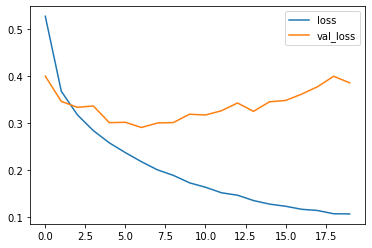

In [11]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

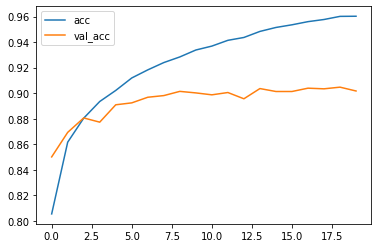

In [12]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
# Model evaluation

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(test_accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.3850 - accuracy: 0.9017
Test Accuracy: 0.9017000198364258


In [19]:
# Model prediction

y_pred = model.predict(x_test).argmax(axis=1)

In [21]:
y_pred[20],  y_test[20] # predicted and actual output

(2, 2)

In [22]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[822   0  28  19   4   2 117   0   8   0]
 [  2 970   1  17   3   0   5   0   2   0]
 [ 12   1 866   9  47   0  63   0   2   0]
 [ 10   4  10 920  30   0  25   0   1   0]
 [  0   0  59  22 839   0  78   0   2   0]
 [  0   0   0   1   0 979   0  13   1   6]
 [ 97   0  58  21  81   1 729   0  13   0]
 [  0   0   0   1   0  18   0 942   1  38]
 [  2   1   3   2   4   3   5   1 977   2]
 [  0   0   0   0   0   6   2  18   1 973]]


In [23]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9017
